#Observable Trends
1. Drug Capomulin exhibit decreases in mean tumor size during the treatment.

2. Drug Capomulin exhibit slower spread in metastatic sites during the treatment.

3. Drug Capomulin and exhibit slower decrease in survival rate of mice during the treatment.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "../data/mouse_drug_data.csv"
clinical_trial_data_to_load = "../data/clinicaltrial_data.csv"

In [2]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data_to_load)
clinical_trial = pd.read_csv(clinical_trial_data_to_load)

print(mouse_drug.head())
print(clinical_trial.head())
# Combine the data into a single dataset
combined = pd.merge(clinical_trial,mouse_drug, on = "Mouse ID")

# Display the data table for preview
combined.head()

  Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [3]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 0 to 1905
Data columns (total 5 columns):
Mouse ID              1906 non-null object
Timepoint             1906 non-null int64
Tumor Volume (mm3)    1906 non-null float64
Metastatic Sites      1906 non-null int64
Drug                  1906 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 89.3+ KB


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = combined.groupby(["Drug","Timepoint"]).mean()
# Convert to DataFrame
mean_tumor_volume = mean_tumor_volume["Tumor Volume (mm3)"]
mean_tumor_volume = pd.DataFrame(mean_tumor_volume)
mean_tumor_volume = mean_tumor_volume.reset_index()
# Preview DataFrame
mean_tumor_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
SE_tumor_volume = combined.groupby(["Drug","Timepoint"]).sem()
SE_tumor_volume = SE_tumor_volume["Tumor Volume (mm3)"]
# Convert to DataFrame
SE_tumor_volume = pd.DataFrame(SE_tumor_volume)
SE_tumor_volume = SE_tumor_volume.reset_index()
# Preview DataFrame
SE_tumor_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_clean = mean_tumor_volume.pivot_table(index = "Timepoint",columns = "Drug", values = "Tumor Volume (mm3)")

# Preview that Reformatting worked
mean_tumor_volume_clean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


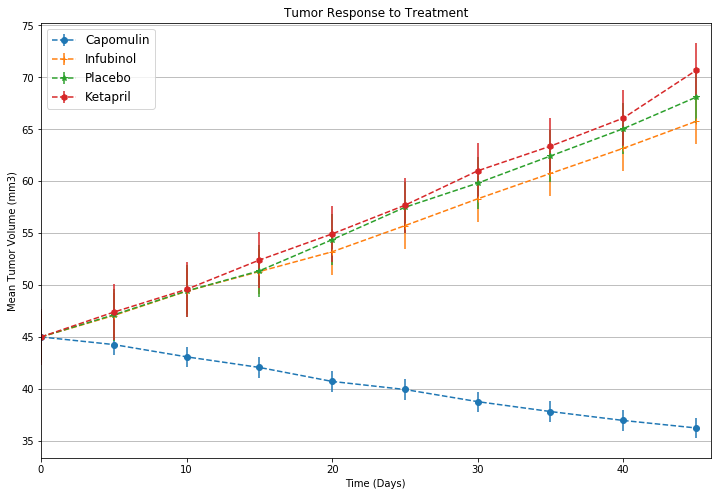

In [15]:
mean_tumor_volume_subset = mean_tumor_volume_clean[["Capomulin","Infubinol","Placebo","Ketapril"]]
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(figsize = (12,8))
fmt = ["o","+","*","h"]
for i,j in zip(mean_tumor_volume_subset.columns,fmt):
    ax.errorbar(mean_tumor_volume_subset.index, mean_tumor_volume_subset[i], 
           yerr =mean_tumor_volume_subset[i].sem(), marker = j, linestyle = "--", label = i)

plt.legend(loc = "upper left",fontsize = "large",fancybox = True)
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Mean Tumor Volume (mm3)")
ax.set_title("Tumor Response to Treatment")
plt.xlim(min(mean_tumor_volume_clean.index),max(mean_tumor_volume_clean.index)+1)
ax.yaxis.grid()

# Save the Figure
plt.savefig("Tumor Response to Treatment.png")

In [16]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [18]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_MS = combined.groupby(["Drug","Timepoint"]).mean()
mean_MS = mean_MS["Metastatic Sites"]
# Convert to DataFrame
mean_MS = pd.DataFrame(mean_MS)
# Preview DataFrame
mean_MS.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [19]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
SE_MS = combined.groupby(["Drug","Timepoint"]).sem()
SE_MS = SE_MS ["Metastatic Sites"]
# Convert to DataFrame
SE_MS = pd.DataFrame(SE_MS)
# Preview DataFrame
SE_MS.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [21]:
# Minor Data Munging to Re-Format the Data Frames
mean_MS_clean = mean_MS.pivot_table(index = "Timepoint",columns = "Drug", values = "Metastatic Sites")

# Preview that Reformatting worked
mean_MS_clean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


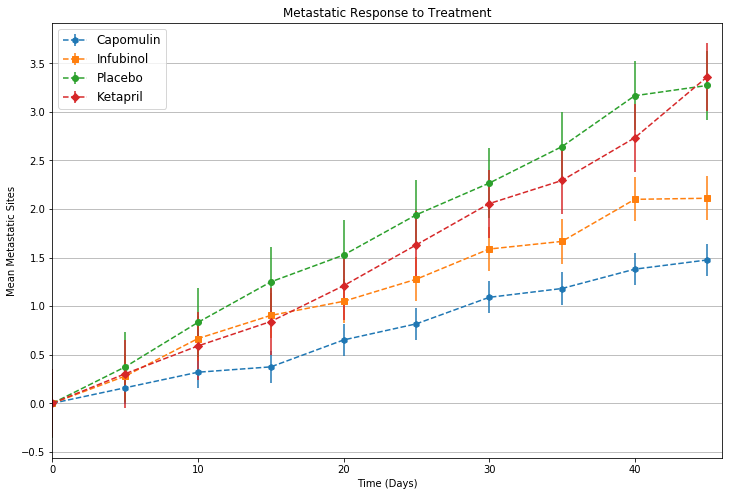

In [52]:
mean_MS_subset = mean_MS_clean[["Capomulin","Infubinol","Placebo","Ketapril"]]
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(figsize = (12,8))
fmt = ["h","s","o","D"]

for i,j in zip(mean_MS_subset.columns,fmt):
    ax.errorbar(mean_MS_subset.index, mean_MS_subset[i], 
           yerr =mean_MS_subset[i].sem(), marker = j, linestyle = "--", label = i)
plt.legend(loc = "best",fontsize = "large", fancybox = True)
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Mean Metastatic Sites")
ax.set_title("Metastatic Response to Treatment")
plt.xlim(min(mean_MS_clean.index),max(mean_MS_clean.index)+1)
ax.yaxis.grid()

# Save the Figure
plt.savefig("Metastatic Response to Treatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [24]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = combined.groupby(["Drug","Timepoint"])["Mouse ID"].count()
# Convert to DataFrame
mice_count = pd.DataFrame(mice_count)
mice_count = mice_count.reset_index()
mice_count = mice_count.rename(columns = {"Mouse ID":"Mice Count"})
# Preview DataFrame
mice_count.head()

,Drug,Timepoint,Mice Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [25]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_clean = mice_count.pivot_table(index = "Timepoint", columns = "Drug", values = "Mice Count")
# Preview the Data Frame
mice_count_clean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [27]:
#Calculate the survial rate of mice
mice_count_percentage = mice_count_clean.copy()
mice_count_percentage = (mice_count_percentage/mice_count_percentage.iloc[0,:]) *100
#Preview of the data frame
mice_count_percentage.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0


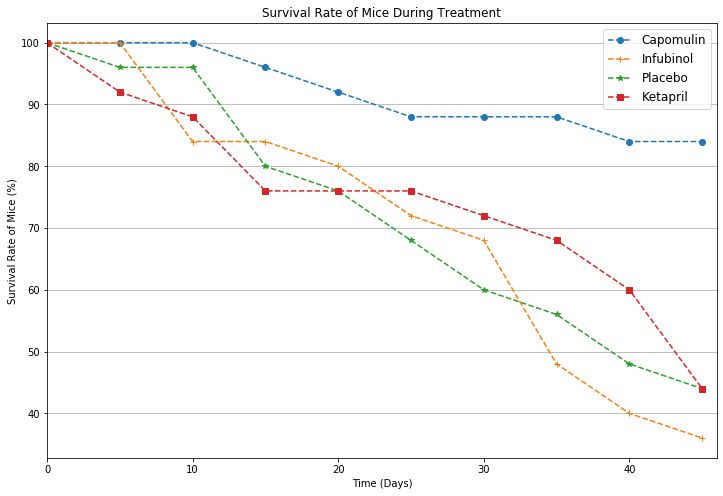

In [33]:
mice_count_percentage_subset = mice_count_percentage[["Capomulin","Infubinol","Placebo","Ketapril"]]

# Generate the Plot (Accounting for percentages)
mice_count_plot = mice_count_percentage_subset.plot(figsize = (12,8), linestyle = "--",style = ["o","+","*","s"])

mice_count_plot.yaxis.grid()
plt.xlim(min(mice_count_percentage_subset.index),max(mice_count_percentage_subset.index)+1)

mice_count_plot.set_xlabel("Time (Days)")
mice_count_plot.set_ylabel("Survival Rate of Mice (%)")
mice_count_plot.set_title("Survival Rate of Mice During Treatment")
plt.legend(loc = "best", fontsize = "large", fancybox = True)

# Save the Figure
plt.savefig("Survival Rate of Mice during Treatment.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [34]:
# Calculate the percent changes for each drug
drug_percentage_change = mean_tumor_volume_clean.copy()

drug_percentage_change = ((drug_percentage_change.iloc[9,:]-drug_percentage_change.iloc[0,:])/drug_percentage_change.iloc[0,:]) *100
# Display the data to confirm
drug_percentage_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [35]:
# Store all Relevant Percent Changes into a Tuple
# Splice the data between passing and failing drugs
summary = (passing_drug,passing_rate,failing_drug,failing_rate)=([(drug_percentage_change == i).argmax() for i in drug_percentage_change if i >= 0],
                                                                 [i for i in drug_percentage_change if i >= 0],
                                                                 [(drug_percentage_change == i).argmax() for i in drug_percentage_change if i < 0],
                                                                 [i for i in drug_percentage_change if i < 0])
print(type(summary))
print(passing_drug)
print(passing_rate)
print(failing_drug)
print(failing_rate)

<class 'tuple'>
['Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Stelasyn', 'Zoniferol']
[42.516491855897414, 46.12347172785184, 57.02879468660604, 53.923347134769195, 51.29796048315153, 47.24117486320634, 52.085134287898995, 46.57975086509522]
['Capomulin', 'Ramicane']
[-19.475302667894155, -22.32090046276666]


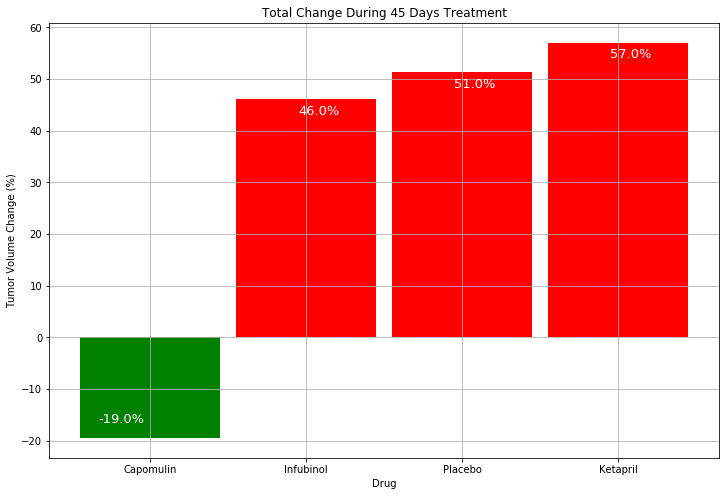

In [45]:
drug_percentage_change_subset = drug_percentage_change[["Capomulin","Infubinol","Placebo","Ketapril"]]
# Orient widths. Add labels, tick marks, etc.
fig,ax = plt.subplots(figsize = (12,8))
plt.grid()
color = ["green" if i < 0 else "red" for i in drug_percentage_change]

ax.bar(drug_percentage_change_subset.index,drug_percentage_change_subset,color = color, width = 0.9)

ax.set_xlabel("Drug")
ax.set_ylabel("Tumor Volume Change (%)")
ax.set_title("Total Change During 45 Days Treatment")

# Use functions to label the percentages of changes
# Call functions to implement the function calls
for i in ax.patches:
    if i.get_height() >= 0:
        ax.text(i.get_x()+.4, i.get_height()-3, 
            str(round(i.get_height(), 0))+"%", fontsize=13, color = "white", alpha = 1)
    else: ax.text(i.get_x()+.12, i.get_height()+3, 
            str(round(i.get_height(), 0))+"%", fontsize=13, color = "white", alpha = 1)
# Save the Figure
plt.savefig("Total Change During 45 Days Treatment.png")

# Show the Figure
fig.show()